In [56]:
# Importing libraries and warnings 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [57]:
# reading the data 
df=pd.read_csv('day.csv')

# checking the data 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
# checking shape

df.shape

(730, 16)

In [59]:
# Checking the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [60]:
#  checking overall statsistical data 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### No Null values in dataset

In [61]:
# dropping the following columns `instant`,`dteday`,`casual`,`registered` 

df = df.drop(columns=['instant','dteday','casual','registered'])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Reason for dropping above colums
instant is an index column so we drop it dteday and yr month are having same data

casual+registered=cnt and cnt is our target variable so we will not consider casual and registered

In [62]:
# summary statistics of numerical variables
df[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


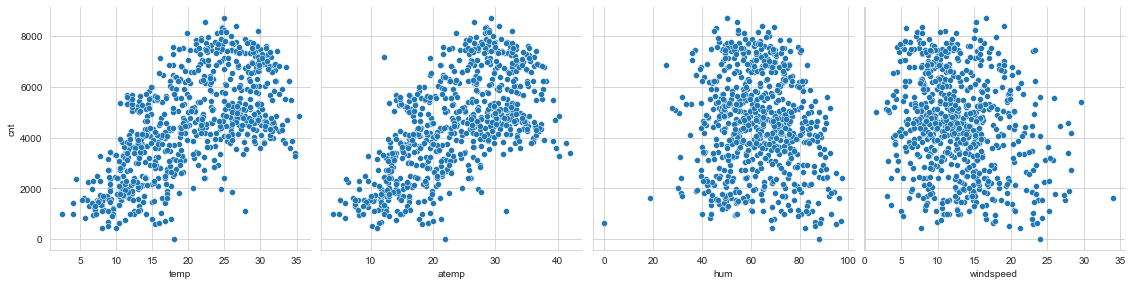

In [63]:
sns.pairplot(df, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter',diag_kind=None)
plt.show()

In [64]:
## Dropping outliers in continuous variables
# outliers in temp
df = df.drop(index = df[(df['temp'] > 15) & (df['temp'] < 20) & (df['cnt'] < 100)].index)
df = df.drop(index = df[(df['temp'] > 25) & (df['temp'] < 30) & (df['cnt'] < 2000)].index)


# outliers in atemp
df = df.drop(index = df[(df['atemp'] > 20) & (df['atemp'] < 25) & (df['cnt'] < 100)].index)
df = df.drop(index = df[(df['atemp'] > 30) & (df['atemp'] < 35) & (df['cnt'] < 2000)].index)


#outliers in hum
df = df.drop(index = df[(df['hum'] < 20)].index)

#outliers in windspeed
df = df.drop(index = df[(df['windspeed'] > 30)].index)

In [65]:
# Looking at correlation with continuous variables 
correlation = df[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


In [66]:
# correlation between ```temp``` and ```atemp```
df[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


In [67]:
# dropping ```atemp```,because correlation between 'temp' and 'atemp' is 1 
df = df.drop(columns=['atemp'])

In [68]:
df[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


### Data Visualization 

In [69]:
# Converting variables: 
df[['season','weathersit','mnth']] = df[['season','weathersit','mnth']].astype('category')

In [70]:
# checking unique values in each categorical variable 
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, df[i].unique())

Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [1 2 3 4 5 6 0]
Unique values in  workingday [1 0]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [2, 1, 3]


In [71]:
# replacing categorical values:

season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels 
df['season'] = df['season'].replace(season_labels)
df['mnth'] = df['mnth'].replace(mnth_labels)
df['weekday'] = df['weekday'].replace(weekday_labels)
df['weathersit'] = df['weathersit'].replace(weathersit_labels)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Monday,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Tuesday,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


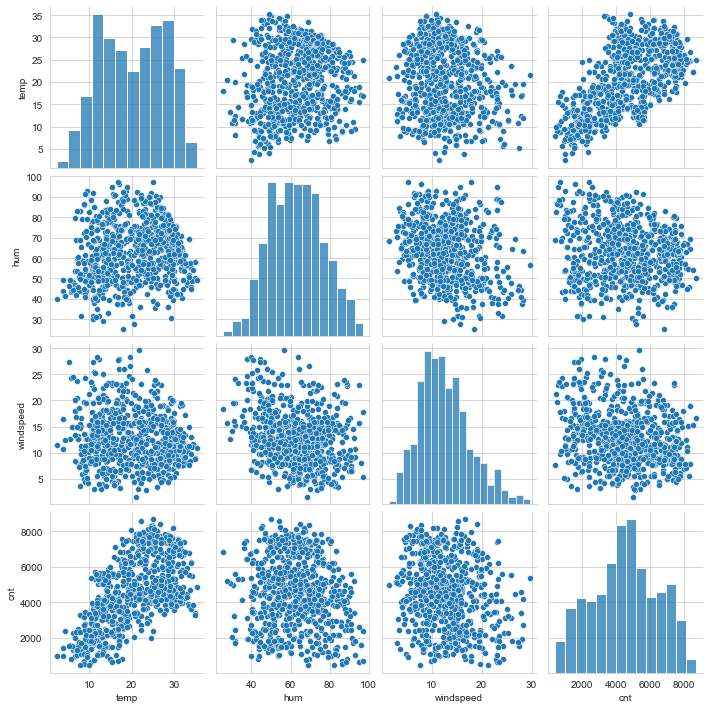

In [72]:
# PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

sns.pairplot(df, vars=['temp','hum','windspeed',"cnt"])
plt.show()

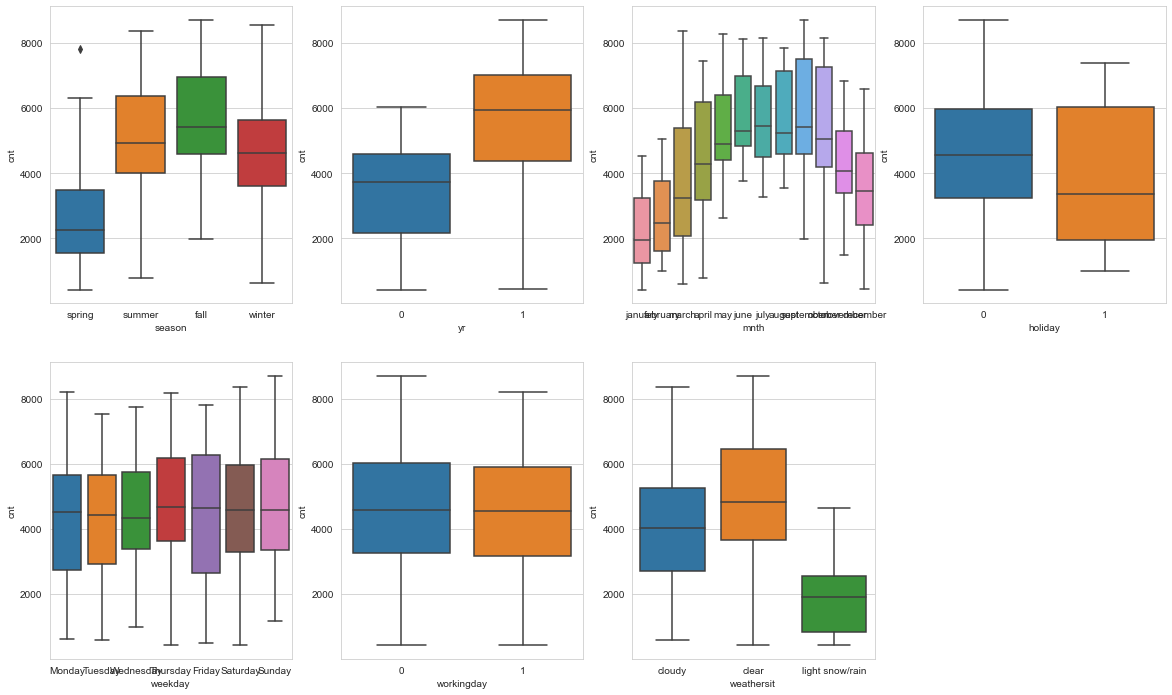

In [73]:
#Visualising categorical Variables to understand data better

plt.figure(figsize=(20, 12))
#season (1:spring, 2:summer, 3:fall, 4:winter)
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
#yr : year (0: 2018, 1:2019)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
#mnth : month ( 1 to 12)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.show()

In [74]:
# Dropping outliers in Categorical Variables 
df = df.drop(index = df[(df['season'] == 'spring') & (df['cnt'] > 7000)].index)

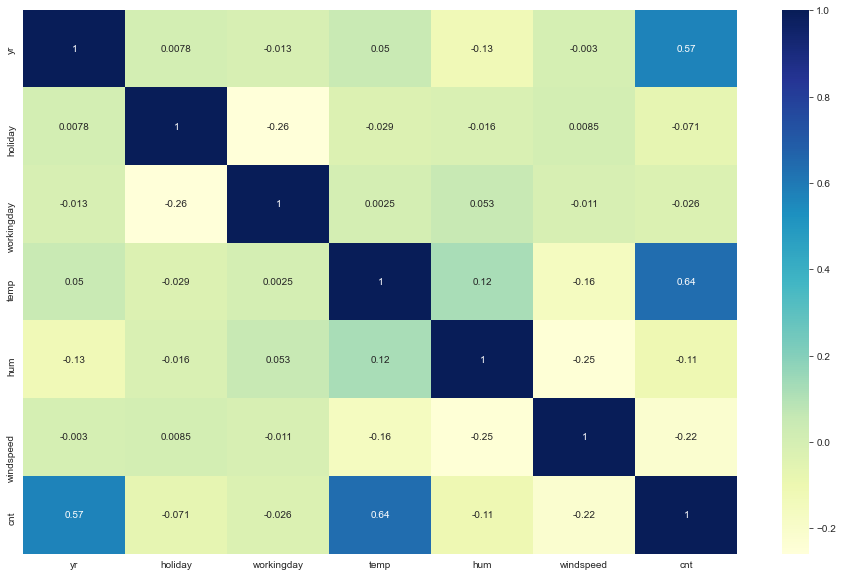

In [75]:
# checking correlation 

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Highest correlation with cnt is seen in temp followed by yr

### Data Preperation 

In [76]:
# creating indicator variable columns
season_indicators = pd.get_dummies(df['season'],drop_first=True)
mnth_indicators = pd.get_dummies(df['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(df['weathersit'],drop_first=True)

In [77]:
# adding indicator variable columns to the dataset . Dropping original columns
df = pd.concat([df,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
df = df.drop(columns=['season','mnth','weekday','weathersit'])
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'cloudy', 'light snow/rain'],
      dtype='object')

### Splitting data 

In [89]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
dtrain,dtest = train_test_split(df,train_size=0.7,test_size=0.3,random_state=120)

In [90]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler 
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

In [91]:
# X_train and y_train 

y_train = dtrain.pop('cnt')
X_train = dtrain

In [92]:
y_train.head()

231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [93]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
231,0,0,1,0.795440,0.584687,0.155696,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
717,1,0,1,0.340632,0.516822,0.355128,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
107,0,0,1,0.564921,0.401392,0.303720,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
595,1,0,1,0.718600,0.636891,0.110569,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
485,1,0,1,0.690564,0.564384,0.285008,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [94]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

In [95]:
# Selecting Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [102]:
# RFE Feature Ranking

rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sunday
21,1,True,Saturday
19,1,True,september
18,1,True,october
16,1,True,may
15,1,True,march
26,1,True,cloudy
13,1,True,july
4,1,True,hum


In [103]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sunday', 'Saturday', 'september', 'october', 'may', 'march',
       'cloudy', 'july', 'hum', 'workingday', 'temp', 'windspeed',
       'spring', 'light snow/rain'], dtype=object)

### Elimination 

In [104]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df1 = sm.add_constant(X)
    vif = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df1.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

In [105]:
## Model 1
# Using features selected by RFE

features_1 = selected_features
ols_fit(y_train,X_train[features_1])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     189.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.61e-193
Time:                        22:35:03   Log-Likelihood:                -4057.2
No. Observations:                 506   AIC:                             8146.
Df Residuals:                     490   BIC:                             8214.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2215.3505    279.356     

In [108]:
##Model 2 : 
# Dropping 'workingday ' because of high vif -value

del_feature = 'workingday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.37e-191
Time:                        22:37:42   Log-Likelihood:                -4063.2
No. Observations:                 506   AIC:                             8156.
Df Residuals:                     491   BIC:                             8220.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2894.9264    200.348     

In [109]:
## Model 3 
# Dropping 'Saturday' because of high p-value

del_feature = 'Saturday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.35e-192
Time:                        22:38:42   Log-Likelihood:                -4063.6
No. Observations:                 506   AIC:                             8155.
Df Residuals:                     492   BIC:                             8214.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2916.6851    198.767     

In [110]:
vif(X_train[selected_features])

              index        vif
0             const  35.122085
10             temp   2.311217
9               hum   2.253839
12           spring   1.973151
7            cloudy   1.747862
8              july   1.412340
13  light snow/rain   1.397051
3         september   1.208157
11        windspeed   1.200348
5               may   1.152668
4           october   1.144746
6             march   1.117196
1                yr   1.042315
2            Sunday   1.022140


#### VIF is less than  5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

In [111]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.35e-192
Time:                        22:40:50   Log-Likelihood:                -4063.6
No. Observations:                 506   AIC:                             8155.
Df Residuals:                     492   BIC:                             8214.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2916.6851    198.767     

### Residual Analysis 

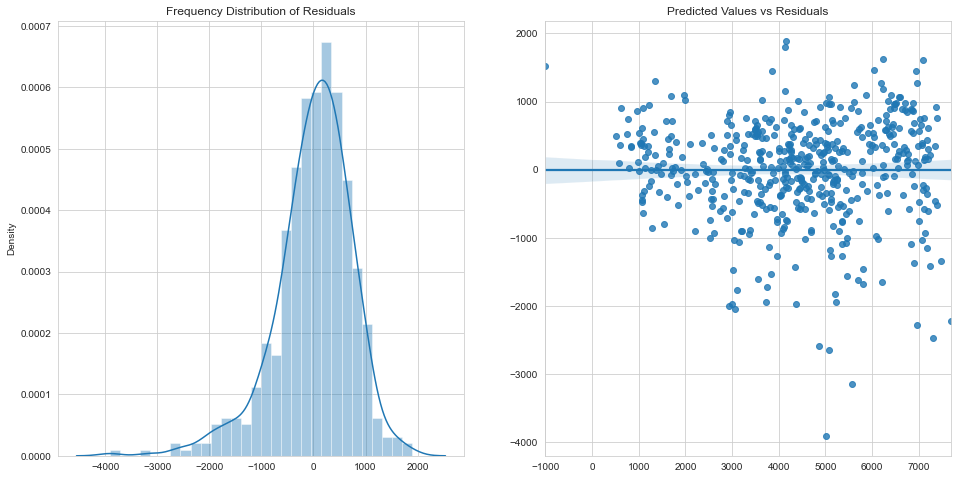

In [112]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [113]:
# Mean of Residuals
(y_train-y_train_pred).mean()

5.037270556756188e-13

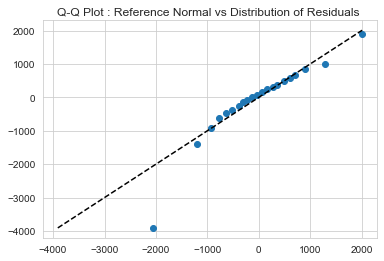

In [114]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
m = plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.savefig('q-q-plot.png')
plt.show()

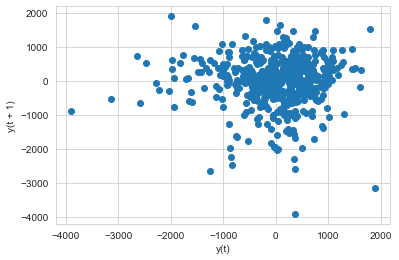

In [116]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)
plt.show()

## Prediction 

In [117]:
y_test = dtest.pop('cnt')
X_test = dtest
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [118]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

### Evaluation 

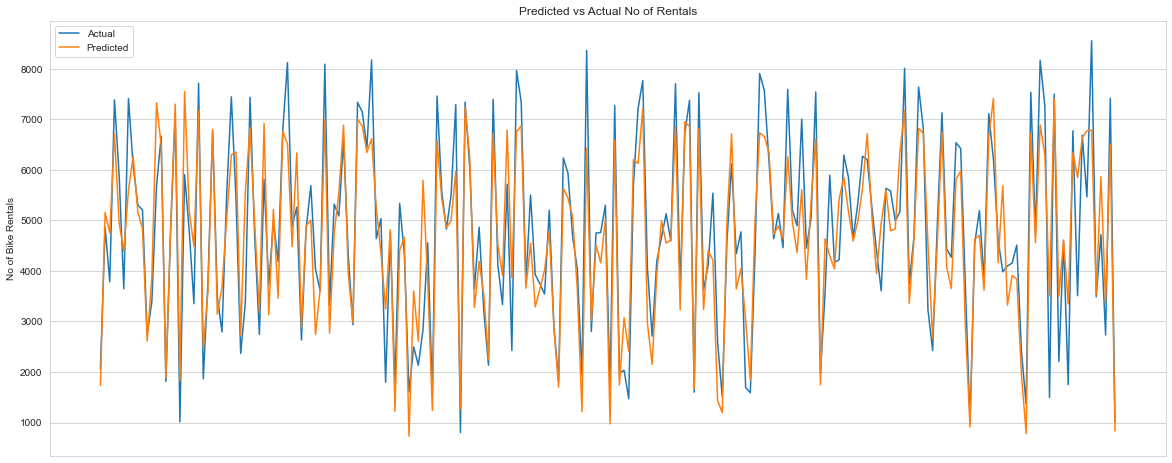

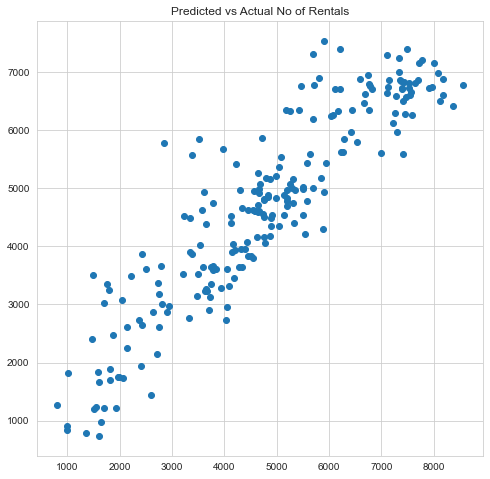

In [119]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

##### Predicted vs observed value plots shows that the model is reasonably accurate. 

In [120]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.82
Mean Squared Error 645446.191


### Stability

In [121]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.81277104, 0.89311836, 0.76586081, 0.90991599, 0.84326199,
       0.86944591, 0.85345592, 0.73973819, 0.71569671, 0.87114967])

In [122]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.13)


#### Top Features 




In [124]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [2916.68505409]


,MLR Coefficients
temp,3665.216960
yr,1968.031350
october,789.445122
september,551.600280
march,433.169258
may,344.957098
Sunday,133.664425
cloudy,-407.705370
july,-639.567606
windspeed,-1070.059839
